# Решения по SymPy

Этот ноутбук содержит решения заданий в формате:

Задание N

Решение


In [26]:
import sympy as sp
from sympy import symbols, Eq, simplify, expand, sin, cos, tan, atan, sqrt, oo, limit, integrate, lambdify, latex
from sympy import UnevaluatedExpr as ue
from sympy.plotting import plot

sp.init_printing(use_latex='mathjax')

x, y, a, b = sp.symbols('x y a b', real=True)


## Задание 1
Вывести на экран выражение без упрощения:
$$3-5\left(\tfrac{1}{2}-1\right)+0.3-x+y^2+\tfrac{x+2}{1+10^{-2}}.$$ 

### Решение


In [27]:
expr1 = ue(3) - 5*(ue(1)/ue(2) - ue(1)) + ue(0.3) - x + y**2 + (x + ue(2))/(ue(1) + ue(10)**(-2))
expr1


                            -1                           
      2           ⎛      -2⎞       ⎛        -1⎞          
-x + y  + (x + 2)⋅⎝1 + 10  ⎠   - 5⋅⎝-1 + 1⋅2  ⎠ + 0.3 + 3

## Задание 2
Конвертировать выражение из задания 1 в LaTeX и отобразить.

### Решение


In [28]:
latex_expr1 = latex(expr1)
print(latex_expr1)

# Для наглядности также отобразим символьный объект
expr1


- x + y^{2} + \left(x + 2\right) \left(1 + 10^{-2}\right)^{-1} - 5 \left(- 1 + 1 \cdot 2^{-1}\right) + 0.3 + 3


                            -1                           
      2           ⎛      -2⎞       ⎛        -1⎞          
-x + y  + (x + 2)⋅⎝1 + 10  ⎠   - 5⋅⎝-1 + 1⋅2  ⎠ + 0.3 + 3

## Задание 3
Задать произвольные значения переменным x и y и пересчитать выражение.

### Решение


In [29]:
val = expr1.subs({x: 2.5, y: -1.3})
val.evalf()


                      -1                                         -1    
            ⎛      -2⎞                          -1     ⎛      -2⎞      
-0.81 + 2.5⋅⎝1 + 10  ⎠   + 0.3 + 5.0⋅1 - 5.0⋅1⋅2   + 2⋅⎝1 + 10  ⎠   + 3

## Задание 4
Упростить выражение:
$$\left(\tfrac{2a}{2a+b}-\tfrac{4a^2}{4a^2+4ab+b^2}\right)\cdot\left(\tfrac{2a}{4a^2-b^2}+\tfrac{1}{b-2a}\right)^{-1}+\tfrac{8a^2}{2a+b}.$$

### Решение


In [30]:
expr4 = ( (2*a)/(2*a + b) - (4*a**2)/(4*a**2 + 4*a*b + b**2) ) * \
        ( (2*a)/(4*a**2 - b**2) + 1/(b - 2*a) )**(-1) + (8*a**2)/(2*a + b)
simplify(expr4)


2⋅a

## Задание 5
Раскрыть скобки: $\dfrac{(x+1)^3}{(x+2)^2}$ и $\sin(x+y)$.

### Решение


In [31]:
expanded1 = expand(((x+1)**3)/((x+2)**2))
expanded2 = expand(sp.sin(x+y))
expanded1, expanded2


⎛      3               2                                              ⎞
⎜     x             3⋅x            3⋅x             1                  ⎟
⎜──────────── + ──────────── + ──────────── + ────────────, sin(x + y)⎟
⎜ 2              2              2              2                      ⎟
⎝x  + 4⋅x + 4   x  + 4⋅x + 4   x  + 4⋅x + 4   x  + 4⋅x + 4            ⎠

## Задание 6
Для вещественных a, b последовательно вычислить:

- $x=\dfrac{e^{-|a|^{1.2}}+\sin(a^4-b)}{ab}$,
- $y=\dfrac{\cos(a^4-b)+\arctan(a)}{b+x}$,
- $z=\dfrac{\sqrt{\arctan^2 x+1}}{(1+x^2)^{3/2}}$.

### Решение


In [32]:
a_val, b_val = 1.2, -0.8
x_sym = (sp.exp(-sp.Abs(a)**1.2) + sp.sin(a**4 - b)) / (a*b)
y_sym = (sp.cos(a**4 - b) + sp.atan(a)) / (b + x_sym)
z_sym = sp.sqrt(sp.atan(x_sym)**2 + 1) / ((1 + x_sym**2)**(sp.Rational(3, 2)))

x_num = sp.N(x_sym.subs({a: a_val, b: b_val}))
y_num = sp.N(y_sym.subs({a: a_val, b: b_val}))
z_num = sp.N(z_sym.subs({a: a_val, b: b_val}))

x_num, y_num, z_num


(-0.575898480254818, 0.0641372363868331, 0.734221917544843)

## Задание 7
Для функций $y_1=\sin x$ и $y_2=x-\tfrac{x^3}{6}+\tfrac{x^5}{120}$ найти значения в точках $0,\ \tfrac{\pi}{6},\ \tfrac{\pi}{4},\ \tfrac{\pi}{2}$.

### Решение


In [33]:
y1 = sp.sin(x)
y2 = x - x**3/6 + x**5/120
points = [0, sp.pi/6, sp.pi/4, sp.pi/2]
vals = [(pt, sp.N(y1.subs(x, pt)), sp.N(y2.subs(x, pt))) for pt in points]
vals


⎡           ⎛π                        ⎞  ⎛π                                    ↪
⎢(0, 0, 0), ⎜─, 0.5, 0.500002132588792⎟, ⎜─, 0.707106781186548, 0.707143045779 ↪
⎣           ⎝6                        ⎠  ⎝4                                    ↪

↪   ⎞  ⎛π                       ⎞⎤
↪ 36⎟, ⎜─, 1.0, 1.00452485553482⎟⎥
↪   ⎠  ⎝2                       ⎠⎦

## Задание 8
Построить графики функций из задания 7: отдельно и на одних осях.

### Решение


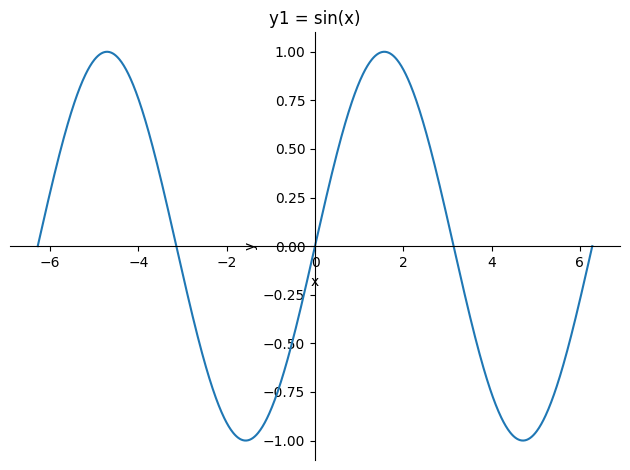

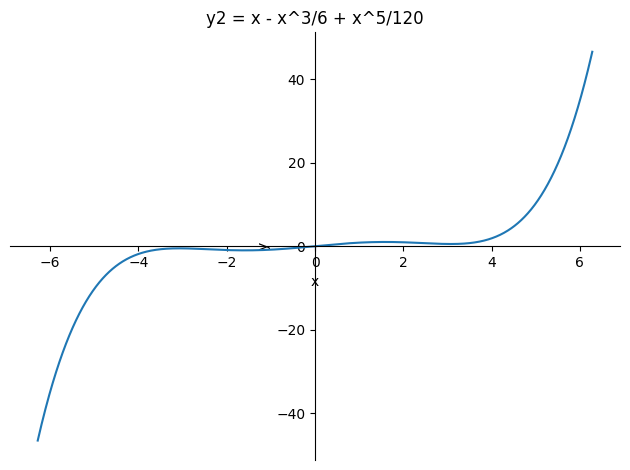

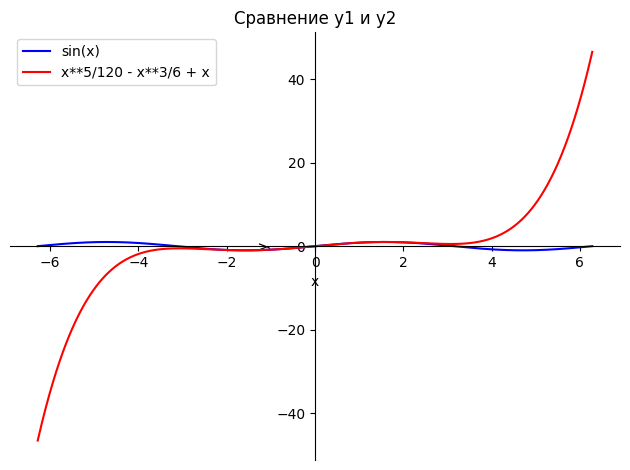

In [34]:
# Отдельно
p1 = plot(y1, (x, -2*sp.pi, 2*sp.pi), title='y1 = sin(x)', ylabel='y', xlabel='x', show=False)
p2 = plot(y2, (x, -2*sp.pi, 2*sp.pi), title='y2 = x - x^3/6 + x^5/120', ylabel='y', xlabel='x', show=False)
p1.show(); p2.show()

# В одних осях 
p_both = plot(y1, y2, (x, -2*sp.pi, 2*sp.pi), title='Сравнение y1 и y2', ylabel='y', xlabel='x', legend=True, show=False)
p_both[0].line_color = 'blue'
p_both[1].line_color = 'red'
p_both.show()


## Задание 9
Для прямых $y=k_1x+b_1$ и $y=k_2x+b_2$ найти угол между ними:
$$\tan\varphi=\frac{k_2-k_1}{1+k_1k_2}.$$
Выразить $\varphi$ и перевести в градусы.

### Решение


In [35]:
k1, k2, b1, b2 = sp.symbols('k1 k2 b1 b2', real=True)
phi = sp.atan((k2 - k1)/(1 + k1*k2))
phi_deg = sp.simplify(phi * 180/sp.pi)
phi, phi_deg


⎛                          ⎛ k₁ - k₂ ⎞ ⎞
⎜                 -180⋅atan⎜─────────⎟ ⎟
⎜    ⎛-k₁ + k₂ ⎞           ⎝k₁⋅k₂ + 1⎠ ⎟
⎜atan⎜─────────⎟, ─────────────────────⎟
⎝    ⎝k₁⋅k₂ + 1⎠            π          ⎠

## Задание 10
Решить уравнение: $x^3-9x^2+23x-15=0$. Подставить найденные корни, проверить равенство и построить график левой части.

### Решение


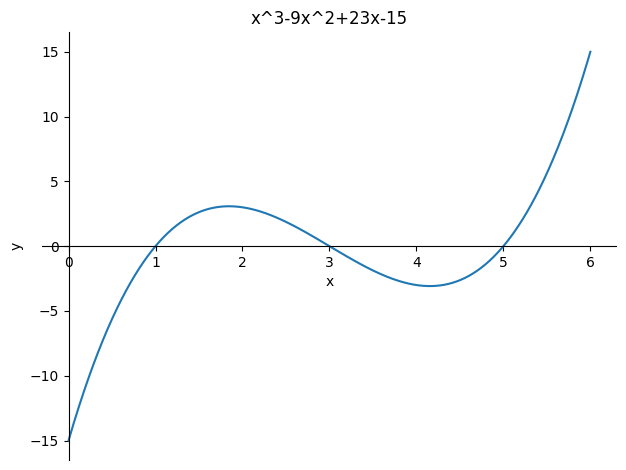

In [36]:
poly = x**3 - 9*x**2 + 23*x - 15
roots = sp.solve(sp.Eq(poly, 0), x)
verification = [sp.simplify(poly.subs(x, r)) for r in roots]
(poly, roots, verification)

# График
p_poly = plot(poly, (x, 0, 6), title='x^3-9x^2+23x-15', ylabel='y', xlabel='x', show=False)
p_poly.show()


## Задание 11
Найти максимум и минимум левой части уравнения из задания 10 на $[1,5]$.

### Решение


In [37]:
f = poly
f_prime = sp.diff(f, x)
critical = sp.solve(sp.Eq(f_prime, 0), x)
critical_in_range = [c for c in critical if c.is_real and 1 <= float(c) <= 5]
vals_11 = [(pt, sp.N(f.subs(x, pt))) for pt in ([1,5] + critical_in_range)]
min_val = min(vals_11, key=lambda t: t[1])
max_val = max(vals_11, key=lambda t: t[1])
vals_11, min_val, max_val


⎛⎡                ⎛    2⋅√3                ⎞  ⎛2⋅√3                     ⎞⎤  ⎛2 ↪
⎜⎢(1, 0), (5, 0), ⎜3 - ────, 3.079201435678⎟, ⎜──── + 3, -3.079201435678⎟⎥, ⎜─ ↪
⎝⎣                ⎝     3                  ⎠  ⎝ 3                       ⎠⎦  ⎝  ↪

↪ ⋅√3                     ⎞  ⎛    2⋅√3                ⎞⎞
↪ ─── + 3, -3.079201435678⎟, ⎜3 - ────, 3.079201435678⎟⎟
↪ 3                       ⎠  ⎝     3                  ⎠⎠

## Задание 12
Решить $x=\cos x$: графически и численно.

### Решение


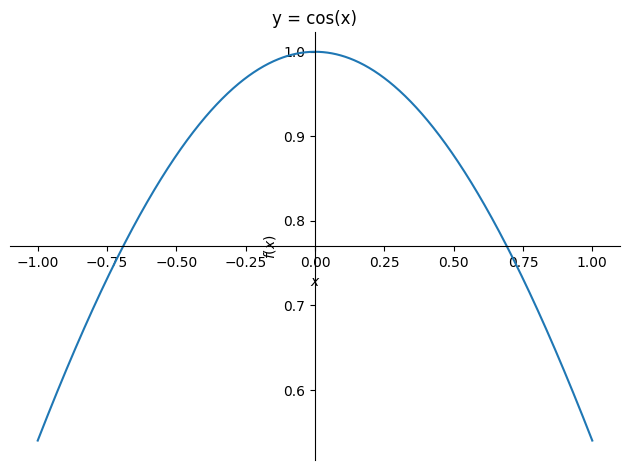

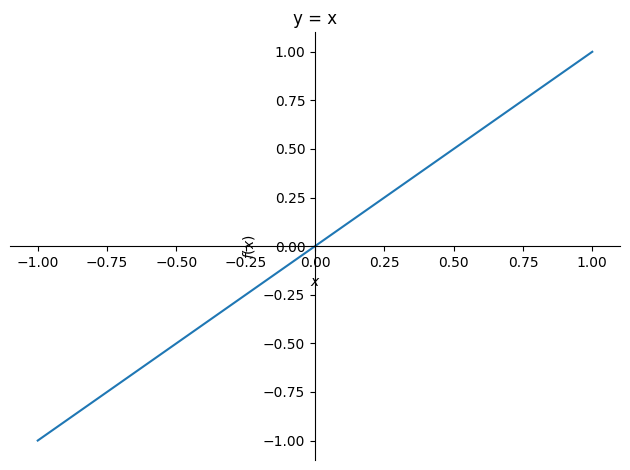

0.739085133215161

In [38]:
# Графически: пересечение y=x и y=cos(x)
p_cos = plot(sp.cos(x), (x, -1, 1), title='y = cos(x)', show=False)
p_line = plot(x, (x, -1, 1), title='y = x', show=False)
p_cos.show(); p_line.show()

# Численно: nsolve
sol_approx = sp.nsolve(sp.Eq(x, sp.cos(x)), 0.7)
sol_approx


## Задание 13
Решить систему:
$\begin{cases}2x+y=3\\4x+3y=7\end{cases}$ и проверить графически.

### Решение


{x: 1, y: 1}


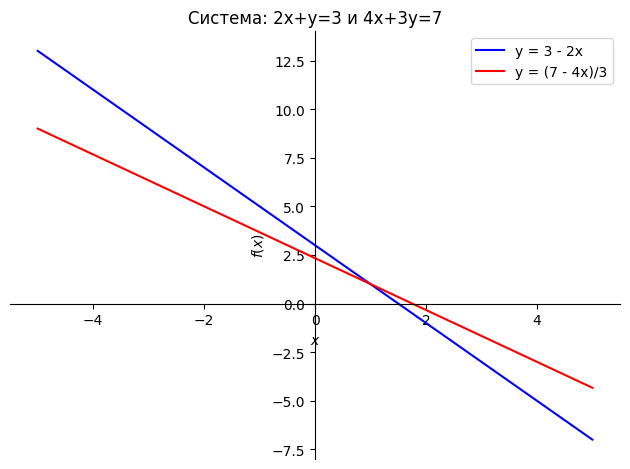

In [45]:
sol_lin = sp.solve([sp.Eq(2*x + y, 3), sp.Eq(4*x + 3*y, 7)], [x, y])
print(sol_lin)

# Для визуальной проверки можно построить две прямые
p_sys = plot(3 - 2*x, (7 - 4*x)/3, (x, -5, 5), show=False, legend=True, title='Система: 2x+y=3 и 4x+3y=7')
p_sys[0].line_color = 'blue'; p_sys[0].label = 'y = 3 - 2x'
p_sys[1].line_color = 'red'; p_sys[1].label = 'y = (7 - 4x)/3'
p_sys.show()


## Задание 14
Решить неравенство $\dfrac{3(x+4)}{x^2+2}<5+x-x^2$.

### Решение


In [40]:
ineq = sp.Lt(3*(x+4)/(x**2+2), 5 + x - x**2)
solution_ineq = sp.solve_univariate_inequality(ineq, x)
solution_ineq


1 < x ∧ x < 2

## Задание 15
Вычислить пределы:
$\lim\limits_{x\to\infty}\left(\frac{x^2-x}{x+5}-\frac{x^3+2x}{x^2-3}\right)$,
$\lim\limits_{x\to\infty}\left(1+\frac{x-3}{x^2+4}\right)^{x}$,
$\lim\limits_{x\to 1}\frac{\sin(\pi x)}{\ln x}$.

### Решение


In [41]:
L1 = sp.limit((x**2 - x)/(x + 5) - (x**3 + 2*x)/(x**2 - 3), x, sp.oo)
L2 = sp.limit((1 + (x - 3)/(x**2 + 4))**x, x, sp.oo)
L3 = sp.limit(sp.sin(sp.pi*x)/sp.log(x), x, 1)
L1, L2, L3


(-6, ℯ, -π)

## Задание 16
Задать произвольную функцию $z(x,y)$ и найти частные производные, одну третью производную и производную высокого порядка.

### Решение


In [42]:
z = sp.sin(x*y) + x**2 * sp.exp(y)
zx = sp.diff(z, x)
zy = sp.diff(z, y)
zxy = sp.diff(z, x, y)
zxxx = sp.diff(z, x, 3)
zhigh = sp.diff(z, x, 4, y, 2)
z, zx, zy, zxy, zxxx, zhigh


⎛ 2  y                  y                2  y                                  ↪
⎝x ⋅ℯ  + sin(x⋅y), 2⋅x⋅ℯ  + y⋅cos(x⋅y), x ⋅ℯ  + x⋅cos(x⋅y), -x⋅y⋅sin(x⋅y) + 2⋅ ↪

↪    y               3            2 ⎛   2  2                                   ↪
↪ x⋅ℯ  + cos(x⋅y), -y ⋅cos(x⋅y), y ⋅⎝- x ⋅y ⋅sin(x⋅y) + 8⋅x⋅y⋅cos(x⋅y) + 12⋅si ↪

↪       ⎞⎞
↪ n(x⋅y)⎠⎠

## Задание 17
Взять неопределённые интегралы:
$\int\dfrac{\ln x}{x\sqrt{1+\ln x}}\,dx$,\quad $\int\dfrac{dx}{3\sin^2 x-8\sin x\cos x+5\cos^2 x}$.

### Решение


In [43]:
I1 = sp.integrate(sp.log(x)/(x*sp.sqrt(1+sp.log(x))), x)
I2 = sp.integrate(1/(3*sp.sin(x)**2 - 8*sp.sin(x)*sp.cos(x) + 5*sp.cos(x)**2), x)
I1, I2


⎛                                           ⎛   2⎛x⎞        ⎛x⎞    ⎞      ⎛    ↪
⎜              3/2                       log⎜tan ⎜─⎟ + 2⋅tan⎜─⎟ - 1⎟   log⎜5⋅t ↪
⎜2⋅(log(x) + 1)          ____________       ⎝    ⎝2⎠        ⎝2⎠    ⎠      ⎝    ↪
⎜───────────────── - 2⋅╲╱ log(x) + 1 , - ─────────────────────────── + ─────── ↪
⎝        3                                            2                        ↪

↪   2⎛x⎞        ⎛x⎞    ⎞⎞
↪ an ⎜─⎟ + 6⋅tan⎜─⎟ - 5⎟⎟
↪    ⎝2⎠        ⎝2⎠    ⎠⎟
↪ ──────────────────────⎟
↪        2              ⎠

## Задание 18
Взять определённые интегралы:
$\int_{0}^{2\pi}\dfrac{dx}{(2+\cos x)(3+\cos x)}$,\quad $\int_0^{\infty}\dfrac{\arctan x}{(1+x^2)^{3/2}}\,dx$.

### Решение


In [44]:
I3 = sp.integrate(1/((2+sp.cos(x))*(3+sp.cos(x))), (x, 0, 2*sp.pi))
I4 = sp.integrate(sp.atan(x)/(1+x**2)**(sp.Rational(3,2)), (x, 0, sp.oo))
I3, I4


⎛  √2⋅π   2⋅√3⋅π       π⎞
⎜- ──── + ──────, -1 + ─⎟
⎝   2       3          2⎠